In [1]:
# importação das bibliotecas 
import pandas as pd

import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score

import statistics

from scipy.stats import randint

import matplotlib.pyplot as plt

import numpy as np

import warnings
warnings.filterwarnings("ignore") 

In [2]:
alemao_df = pd.read_csv("SouthGermanCredit.asc", sep=' ')
alemao_df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [3]:
renomea = {"laufkont" : "status_conta_corrente", "laufzeit" : "duracao", "moral" : "historico_credito", "verw" : "objetivo_proposta",
          "hoehe" : "montante", "sparkont" : "poupanca", "beszeit" : "tempo_emprego", "rate" : "percentual_renda", 
          "famges" : "sexo_estado_civil", "buerge" : "garantia", "wohnzeit" : "tempo_residencia", "verm" : "propriedade",
          "alter" : "idade", "weitkred" : "outro_fornecedor_credito", "wohn" : "tipo_residencia", "bishkred" : "num_credito_tomado",
          "beruf" : "qualificacao_emprego", "pers" : "dependentes", "telef" : "tem_telefone", "gastarb" : "empregado_estrangeiro", 
          "kredit" : "risco_credito"}
alemao_df.rename(columns=renomea, inplace=True)  
alemao_df

,status_conta_corrente,duracao,historico_credito,objetivo_proposta,montante,poupanca,tempo_emprego,percentual_renda,sexo_estado_civil,garantia,...,propriedade,idade,outro_fornecedor_credito,tipo_residencia,num_credito_tomado,qualificacao_emprego,dependentes,tem_telefone,empregado_estrangeiro,risco_credito
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


# Exploração dos dados

In [4]:
alemao_df.describe()\
                        .transpose() 

,count,mean,std,min,25%,50%,75%,max
status_conta_corrente,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
duracao,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
historico_credito,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
objetivo_proposta,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
montante,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
poupanca,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
tempo_emprego,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
percentual_renda,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
sexo_estado_civil,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
garantia,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


In [5]:
# Checando a proporção de registros por classe
bom = alemao_df.loc[alemao_df['risco_credito'] == 1]
ruim = alemao_df.loc[alemao_df['risco_credito'] == 0]
print("Temos", len(bom), "classificados como crédito bom e", len(ruim), "classificados como crédito ruim.")

Temos 700 classificados como crédito bom e 300 classificados como crédito ruim.


In [6]:
alemao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   status_conta_corrente     1000 non-null   int64
 1   duracao                   1000 non-null   int64
 2   historico_credito         1000 non-null   int64
 3   objetivo_proposta         1000 non-null   int64
 4   montante                  1000 non-null   int64
 5   poupanca                  1000 non-null   int64
 6   tempo_emprego             1000 non-null   int64
 7   percentual_renda          1000 non-null   int64
 8   sexo_estado_civil         1000 non-null   int64
 9   garantia                  1000 non-null   int64
 10  tempo_residencia          1000 non-null   int64
 11  propriedade               1000 non-null   int64
 12  idade                     1000 non-null   int64
 13  outro_fornecedor_credito  1000 non-null   int64
 14  tipo_residencia           1000 non-null  

<AxesSubplot:>

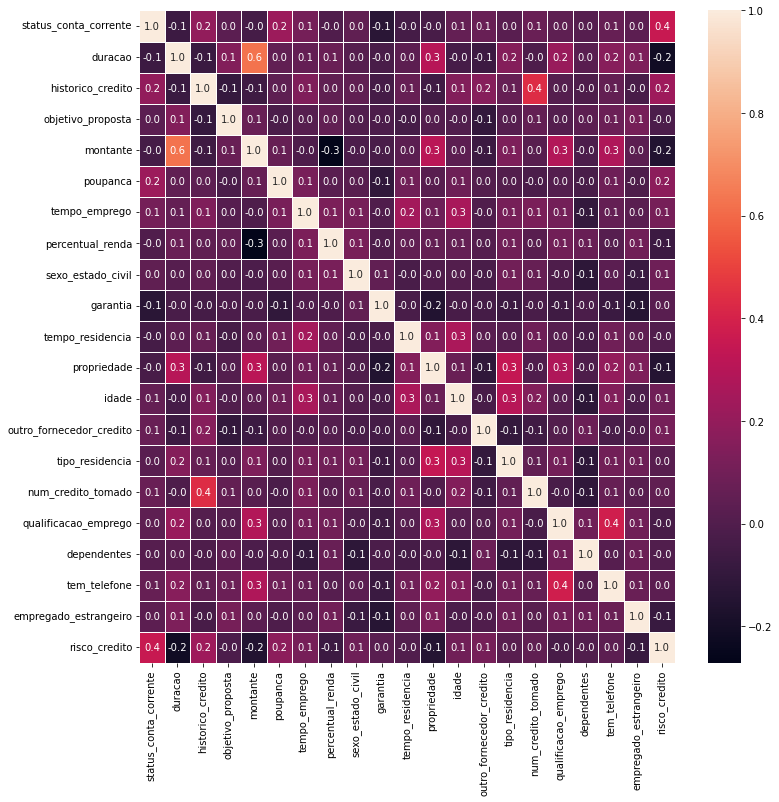

In [7]:
correlation = alemao_df.corr()
fig, ax = plt.subplots(figsize=(12,12)) 
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6, ax=ax)
plot

# Trata variáveis categóricas

In [8]:
categoricas = ["status_conta_corrente", "historico_credito",  "objetivo_proposta", "poupanca",   
                      "sexo_estado_civil", "garantia", "outro_fornecedor_credito", "tipo_residencia", "propriedade", 
                      "qualificacao_emprego",  "tempo_emprego",  "empregado_estrangeiro", "percentual_renda", "tempo_residencia", "num_credito_tomado", "dependentes"]

one_hot = OneHotEncoder(handle_unknown='ignore', categories='auto', drop='first',sparse=False)

cat_df = pd.DataFrame(one_hot.fit_transform(alemao_df[categoricas]), columns = one_hot.get_feature_names_out(categoricas))
cat_df.head()

,status_conta_corrente_2,status_conta_corrente_3,status_conta_corrente_4,historico_credito_1,historico_credito_2,historico_credito_3,historico_credito_4,objetivo_proposta_1,objetivo_proposta_2,objetivo_proposta_3,...,percentual_renda_2,percentual_renda_3,percentual_renda_4,tempo_residencia_2,tempo_residencia_3,tempo_residencia_4,num_credito_tomado_2,num_credito_tomado_3,num_credito_tomado_4,dependentes_2
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [9]:
alemao_df_copia = alemao_df.drop(categoricas, axis=1)
alemao_df_copia = pd.concat([cat_df, alemao_df_copia], axis=1)
alemao_df_copia

,status_conta_corrente_2,status_conta_corrente_3,status_conta_corrente_4,historico_credito_1,historico_credito_2,historico_credito_3,historico_credito_4,objetivo_proposta_1,objetivo_proposta_2,objetivo_proposta_3,...,tempo_residencia_4,num_credito_tomado_2,num_credito_tomado_3,num_credito_tomado_4,dependentes_2,duracao,montante,idade,tem_telefone,risco_credito
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,18,1049,21,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9,2799,36,1,1
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,12,841,23,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,12,2122,39,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,12,2171,38,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,24,1987,21,1,0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,24,2303,45,1,0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,21,12680,30,2,0
998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,12,6468,52,2,0


# Trata variáveis númericas

In [10]:
numericas = ["duracao", "montante", "idade"]
                      
mms = MinMaxScaler()

num_df = pd.DataFrame(mms.fit_transform(alemao_df[numericas]), columns = mms.get_feature_names_out(numericas))
num_df.head()

,duracao,montante,idade
0,0.205882,0.043964,0.035714
1,0.073529,0.140255,0.303571
2,0.117647,0.032519,0.071429
3,0.117647,0.103004,0.357143
4,0.117647,0.105700,0.339286


In [11]:
alemao_df_copia = alemao_df_copia.drop(numericas, axis=1)
alemao_df_copia = pd.concat([num_df, alemao_df_copia], axis=1)
alemao_df_copia


,duracao,montante,idade,status_conta_corrente_2,status_conta_corrente_3,status_conta_corrente_4,historico_credito_1,historico_credito_2,historico_credito_3,historico_credito_4,...,percentual_renda_4,tempo_residencia_2,tempo_residencia_3,tempo_residencia_4,num_credito_tomado_2,num_credito_tomado_3,num_credito_tomado_4,dependentes_2,tem_telefone,risco_credito
0,0.205882,0.043964,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
1,0.073529,0.140255,0.303571,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
2,0.117647,0.032519,0.071429,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
3,0.117647,0.103004,0.357143,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
4,0.117647,0.105700,0.339286,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.294118,0.095576,0.035714,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
996,0.294118,0.112964,0.464286,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
997,0.250000,0.683944,0.196429,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2,0
998,0.117647,0.342137,0.589286,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0


In [12]:
X = alemao_df_copia.loc[:,alemao_df_copia.columns != 'risco_credito']
y = alemao_df_copia['risco_credito']

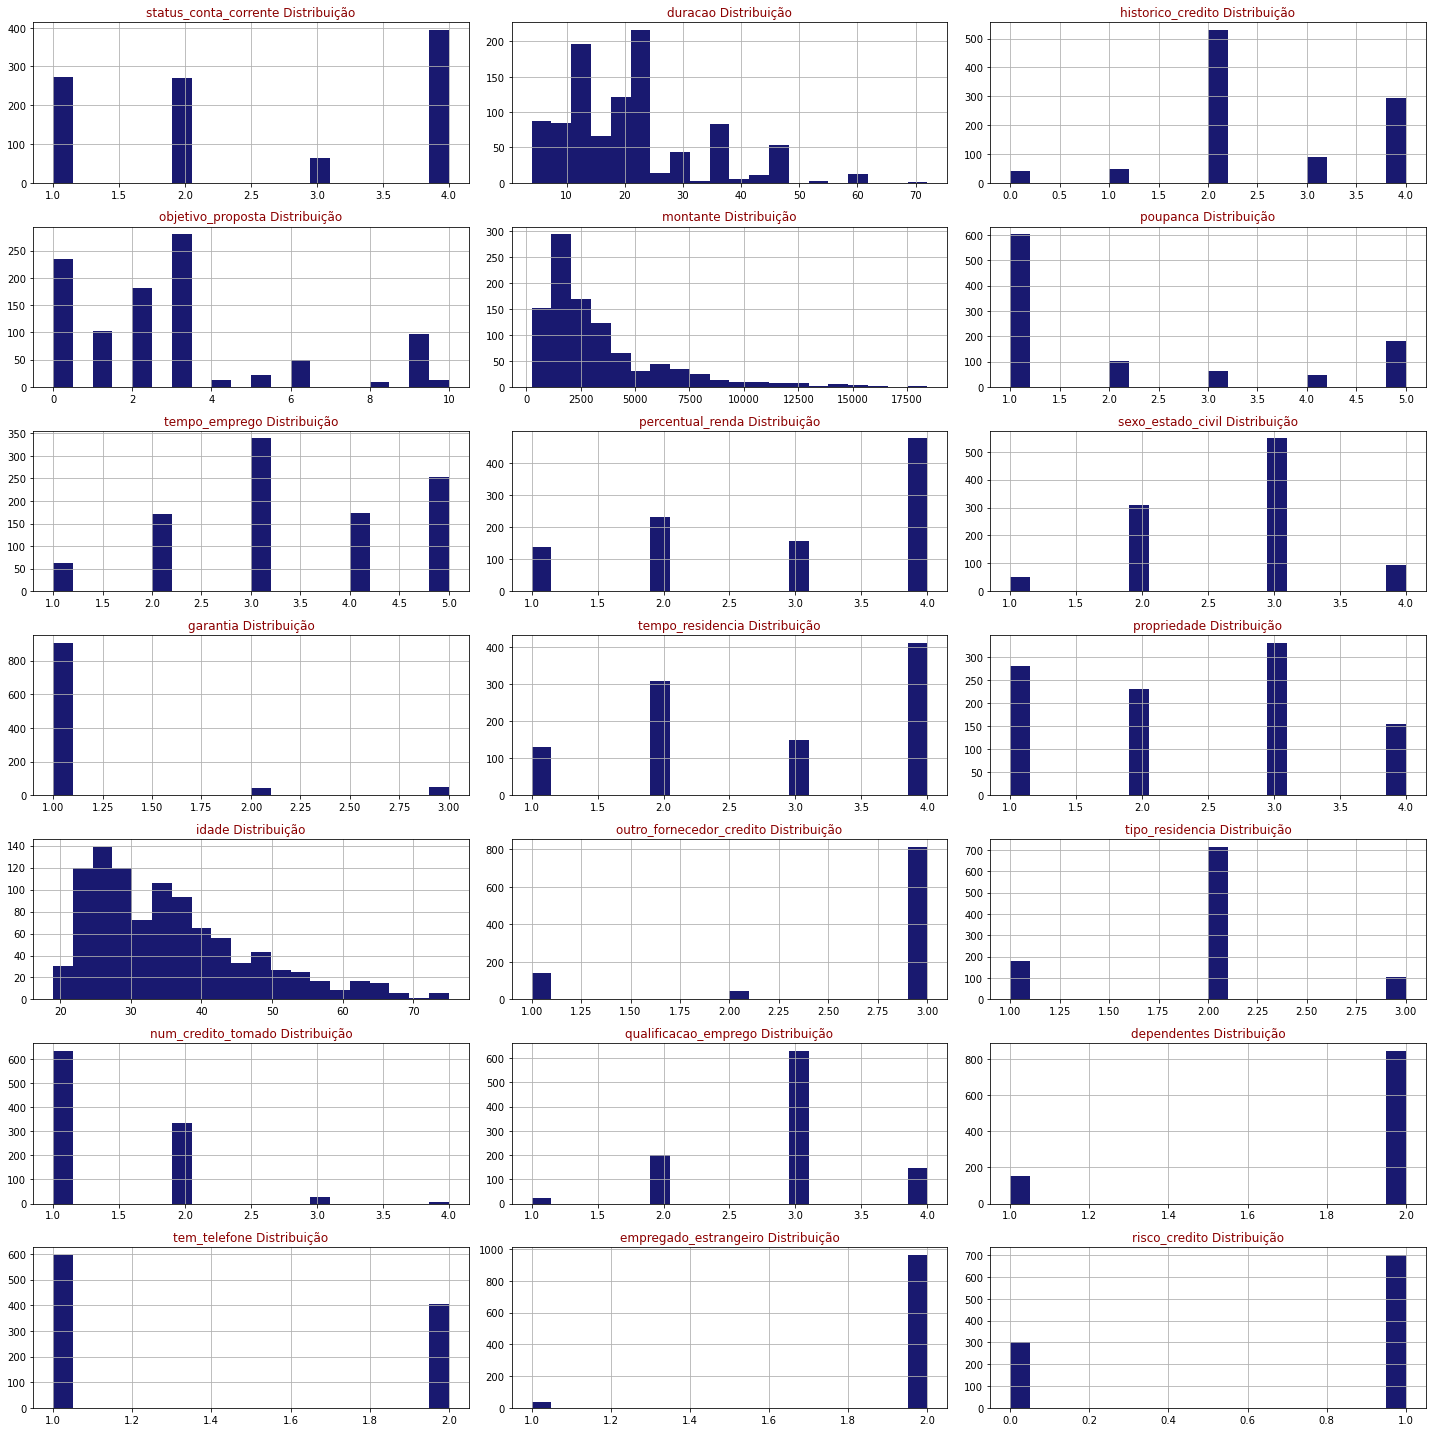

In [13]:
# Visualizar a distribuição de cada variável

rows = 7
cols = 3

fig = plt.figure(figsize = (20,20))

for i, coluna in enumerate(alemao_df.columns):
    ax = fig.add_subplot(rows, cols, i+1)
    alemao_df[coluna].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
    ax.set_title(coluna + " Distribuição", color = 'DarkRed')

fig.tight_layout()  
plt.show()

# Seleção de hiperparametros

Random Forest - Nested Cross validation

In [14]:
espaco_de_parametros = {
    "n_estimators" : range(70, 130, 10),
    "max_depth" : randint(0, 15),
    "min_samples_split" : randint(1, 10),
    "min_samples_leaf" : randint(0, 10),
    "bootstrap" : [True, False],
    "criterion" : ["gini", "entropy"]
}

# cross validation interno (variando conjunto de validação) 
modelo_tree = RandomizedSearchCV(RandomForestClassifier(), espaco_de_parametros, n_iter=10, return_train_score=True,
                           cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state=0)) 

In [15]:
# cross validation externo (variando conjunto de teste)
scores = cross_val_score(modelo_tree, X, y, cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=0))
scores

array([0.75 , 0.76 , 0.695, 0.71 , 0.76 ])

In [16]:
print("Acurácia Média: {:.2%}".format(round(scores.mean(), 3)),"Desvio padrão: {:.2%}".format(round(statistics.stdev(scores), 3)))

Acurácia Média: 73.50% Desvio padrão: 3.00%


SVM - Nested Cross Validation 

In [17]:
espaco_de_parametros = {
    'C': [0.1, 0.5, 1, 2, 5],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

# cross validation interno (variando conjunto de validação) 
modelo_svm = RandomizedSearchCV(svm.SVC(probability=True), espaco_de_parametros, n_iter=10, return_train_score=True,
                           cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state=0)) 

In [18]:
# cross validation externo (variando conjunto de teste)
scores = cross_val_score(modelo_svm, X, y, cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=0))
scores

array([0.7  , 0.775, 0.76 , 0.735, 0.77 ])

In [19]:
print("Acurácia Média: {:.2%}".format(round(scores.mean(), 3)),"Desvio padrão: {:.2%}".format(round(statistics.stdev(scores), 3)))

Acurácia Média: 74.80% Desvio padrão: 3.10%


Regressão logística - Nested Cross Validation

In [20]:
espaco_de_parametros = {
    'C': [0.1, 0.5, 1, 2, 5],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear'], 
    'max_iter': [50, 100, 200, 300, 500]
}

# cross validation interno (variando conjunto de validação) 
modelo_logistic = RandomizedSearchCV(LogisticRegression(), espaco_de_parametros, n_iter=10, return_train_score=True,
                           cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state=0)) 

In [21]:
# cross validation externo (variando conjunto de teste)
scores = cross_val_score(modelo_logistic, X, y, cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=0))
scores

array([0.755, 0.76 , 0.77 , 0.72 , 0.78 ])

In [22]:
print("Acurácia Média: {:.2%}".format(round(scores.mean(), 3)),"Desvio padrão: {:.2%}".format(round(statistics.stdev(scores), 3)))

Acurácia Média: 75.70% Desvio padrão: 2.30%
